In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_wavelengths(dataframe, wavelength_range = [], labels = [], Title = []): # dataframe to be well = row, have to give wavelength actually
    wavelengths = np.asarray(dataframe.iloc[0])
    
    if len(wavelength_range) == 2:
        lower_index = np.where(wavelengths == wavelength_range[0])[0][0] # add logic if only one upper or lower limit provided auto finds missing limit
        upper_index = np.where(wavelengths == wavelength_range[1])[0][0]
        dataframe = dataframe 

        fig, ax = plt.subplots()
        for i, (key, row) in enumerate(dataframe.iterrows()):
            if key == 'Wavelength':
                x = row[lower_index:upper_index]
            else: 
                y = row[lower_index:upper_index]
                ax.plot(x,y,label = labels[i])
#         ax.annotate('hello', xy=(1.05, 0.85), xycoords='axes fraction')   
        ax.legend()
        
    elif len(wavelength_range) == 1:
        wavelength = wavelength_range[0]
        index = np.where(wavelengths == wavelength)[0][0]
        wells = []
        absorbances = []
        for i, (key, row) in enumerate(dataframe.iterrows()):
            if key == 'Wavelength':
                pass
            else:
                well = key
                wells.append(well)
                absorbance = row[index]
                absorbances.append(absorbance)

        absorbances_nm_max = [a/max(absorbances) for a in absorbances]

        plt.scatter(range(len(wells)), absorbances, s = 20, alpha = 0.5, marker = 'o', color = 'r') # in order for sample creation and analysis 
        plt.xlabel('Well Index')
        plt.ylabel('Absorbance')
    
    else:
        fig, ax = plt.subplots()
        for i, (key, row) in enumerate(dataframe.iterrows()):
            if key == 'Wavelength':
                x = row
            else: 
                y = row
                ax.plot(x,y,label = labels[i])
#         ax.annotate('hello', xy=(1.05, 0.85), xycoords='axes fraction')   
        ax.legend()
#     text.append('Remaining component = ' + component_names[completing_component_index])
#     text_newline = '\n'.join(text) 
    plt.xlabel('Wavelength nm')
    plt.ylabel('Absorbance')

In [3]:
# splitting up into dfs so can rearrange in column order
def r_to_c_order(df):    
    key = df.iloc[0]
    A = df.iloc[1:9]
    B = df.iloc[9:17]
    C = df.iloc[17:25]
    D = df.iloc[25:33]
    E = df.iloc[33:41]
    F = df.iloc[41:49]

    concat = [key]
    for i in range(8):
    #     print(A.iloc[i])
        concat.append(A.iloc[i])
        concat.append(B.iloc[i])
        concat.append(C.iloc[i])
        concat.append(D.iloc[i])
        concat.append(E.iloc[i])
        concat.append(F.iloc[i])
    

    final_df = pd.concat(concat, axis =1) # ok so now can begin to match the sample dataframe with this data frame\
    return final_df.T

In [4]:
def baseline_correction(df_samples, baseline_series): # removes the well number during appending :()
# here is where you will specify up to what wells are samples and which is a blank, 
# ideally build into sample creation code an automatic blank so not nec. 
    new_df_con = []
    for key, row in df_samples.iterrows():
        if key == 'Wavelength':
            wavelengths = row
            new_df_con.append(wavelengths)
        else: 
            series = row
#             series = (pd.to_numeric(series , errors='coerce').fillna(0)) # just know that the series is an instance so will not update df
            corrected = series.subtract(baseline_series)
            new_df_con.append(corrected)
    
    baseline_corrected_df = pd.concat(new_df_con, axis = 1)
    return baseline_corrected_df.T

In [5]:
def remove_non_int(df):
    new_df_con = []
    for key, row in df.iterrows():
        series = row
        series = (pd.to_numeric(series , errors='coerce').fillna(0)) # just know that the series is an instance so will not update df
        new_df_con.append(series)
    df_removed_non_int = pd.concat(new_df_con, axis = 1)
    return df_removed_non_int.T

In [6]:
def piece_together(first_slice, second_slice):
    new_df = pd.concat([first_slice, second_slice])
    return new_df

def slice_df(df, n):
    new_df_con = [] 
    for i, (key, row) in enumerate(df.iterrows()):
        series = row
        if i % n == 0:
            new_df_con.append(series)
    new_df = pd.concat(new_df_con, axis = 1)
    return new_df.T

def slice_remove_df(df, n):
    new_df_con = [] 
    for i, (key, row) in enumerate(df.iterrows()):
        series = row
        if i % n == 0:
            pass
        else:
            new_df_con.append(series)
    new_df = pd.concat(new_df_con, axis = 1)
    return new_df.T

In [40]:
df1 =  pd.read_excel(r"C:\Users\Edwin\Desktop\101020\10_06_20_Turbid_Scan.xlsx", sheet_name = 'Sheet1' ).T

In [41]:
df = remove_non_int(df1)
df_baseline_corrected = baseline_correction(df, df.iloc[1])
df

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
Wavelength,200.000,205.000,210.000,215.000,220.000,225.000,230.000,235.000,240.000,245.000,...,950.000,955.000,960.000,965.000,970.000,975.000,980.000,985.000,990.000,995.000
A1,3.490,3.560,3.534,3.517,3.564,3.601,3.961,3.728,3.657,3.797,...,0.166,0.199,0.225,0.236,0.241,0.244,0.242,0.238,0.230,0.224
A2,3.491,3.557,3.530,3.513,3.555,3.596,3.947,3.701,3.650,3.792,...,0.128,0.148,0.165,0.175,0.182,0.188,0.191,0.192,0.191,0.189
B1,3.566,3.635,3.609,3.587,3.630,3.656,0.000,3.782,3.728,3.886,...,0.132,0.152,0.169,0.178,0.185,0.191,0.194,0.195,0.193,0.192
B2,3.533,3.600,3.583,3.558,3.604,3.615,0.000,3.740,3.716,3.848,...,0.128,0.149,0.165,0.175,0.182,0.187,0.190,0.191,0.189,0.189
C1,3.638,3.701,3.682,3.656,3.698,3.720,0.000,3.833,3.800,3.934,...,0.145,0.166,0.182,0.192,0.198,0.204,0.206,0.207,0.206,0.204
C2,3.568,3.641,3.622,3.597,3.637,3.675,0.000,3.798,3.727,3.869,...,0.133,0.153,0.169,0.179,0.186,0.191,0.194,0.195,0.193,0.193
D1,3.839,3.917,3.906,3.888,3.910,3.911,0.000,0.000,3.970,0.000,...,0.195,0.214,0.230,0.239,0.245,0.250,0.252,0.252,0.250,0.248
D2,3.620,3.689,3.677,3.643,3.683,3.705,0.000,3.839,3.769,3.926,...,0.129,0.148,0.162,0.171,0.177,0.182,0.185,0.186,0.183,0.184
E1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.298,0.317,0.332,0.340,0.345,0.349,0.350,0.349,0.345,0.344


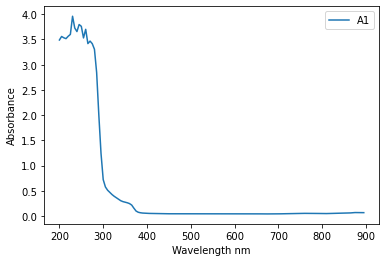

In [42]:
baseline = df[0:1]
names = list(df[0].index) # always do name before baselining as lose well names
new_df_baseline = baseline_correction(df, df.iloc[1])
plot_wavelengths(df[0:2], [200,900], names, Title = 'Baseline')

In [43]:
df[10:11]

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
F1,0.0,0.0,0.0,0.0,0.0,3.985,0.0,0.0,0.0,0.0,...,0.265,0.283,0.298,0.306,0.311,0.315,0.316,0.316,0.312,0.31


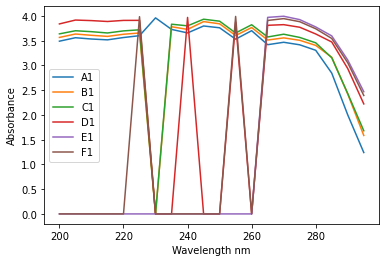

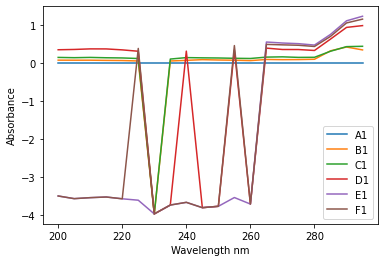

In [45]:
df_sliced = slice_df(df[1:], 2)
d2_NB = piece_together(baseline, df_sliced[0:7])
d2_NB = piece_together(d2_NB, df[10:11])
d2_B = baseline_correction(d2_NB, d2_NB.iloc[1])
names_NB = d2_NB[0].index
names_B = d2_B[0].index
plot_wavelengths(d2_NB, [200, 300], labels = names_NB)
plot_wavelengths(d2_B, [200, 300], labels = names_NB)

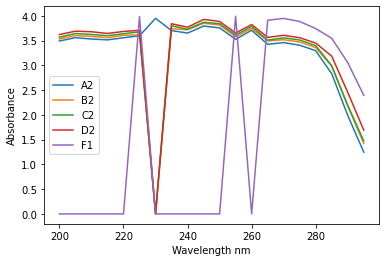

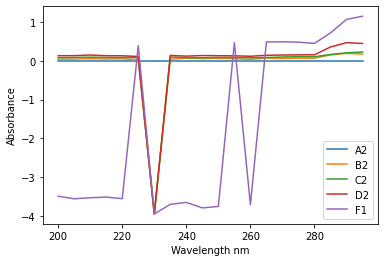

In [49]:
df_sliced_2 = slice_remove_df(df[1:],2)
d2_NB = piece_together(baseline, df_sliced_2)
d2_B = baseline_correction(d2_NB, d2_NB.iloc[1])
names_NB = d2_NB[0].index
names_B = d2_B[0].index
plot_wavelengths(d2_NB, [200, 300], labels = names_NB)
plot_wavelengths(d2_B, [200, 300], labels = names_NB)

In [37]:
d2_B

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
Wavelength,200.000,205.000,210.000,215.000,220.000,225.000,230.000,235.000,240.000,245.000,...,950.000,955.000,960.000,965.000,970.000,975.000,980.000,985.000,990.000,995.000
A1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0,0.076,0.075,0.075,0.070,0.066,0.055,-3.961,0.054,0.071,0.089,...,-0.034,-0.047,-0.056,-0.058,-0.056,-0.053,-0.048,-0.043,-0.037,-0.032
1,0.148,0.141,0.148,0.139,0.134,0.119,-3.961,0.105,0.143,0.137,...,-0.021,-0.033,-0.043,-0.044,-0.043,-0.040,-0.036,-0.031,-0.024,-0.020
2,0.349,0.357,0.372,0.371,0.346,0.310,-3.961,-3.728,0.313,-3.797,...,0.029,0.015,0.005,0.003,0.004,0.006,0.010,0.014,0.020,0.024
3,-3.490,-3.560,-3.534,-3.517,-3.564,-3.601,-3.961,-3.728,-3.657,-3.797,...,0.132,0.118,0.107,0.104,0.104,0.105,0.108,0.111,0.115,0.120
4,-3.490,-3.560,-3.534,-3.517,-3.564,0.384,-3.961,-3.728,-3.657,-3.797,...,0.099,0.084,0.073,0.070,0.070,0.071,0.074,0.078,0.082,0.086
8,-3.490,-3.560,-3.534,-3.517,-3.564,0.384,-3.961,-3.728,-3.657,-3.797,...,0.099,0.084,0.073,0.070,0.070,0.071,0.074,0.078,0.082,0.086
